<a href="https://colab.research.google.com/github/Sreekodavanti/Cloud-Computing/blob/main/Project_2_AWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2

In [ ]:
#Importing Libraries
import sagemaker
import json
import pandas as pd
import numpy as np
import boto3
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [ ]:
#Creating a Sagemaker Session
sagemaker_session = sagemaker.Session()
s3 = sagemaker_session.boto_session.resource("s3")
region = boto3.Session().region_name
role = sagemaker.get_execution_role()

A SageMaker session is created, an S3 resource is accessed, AWS region and the IAM role for the SageMaker instance are retrieved. These are essential steps for setting up the SageMaker environment to work with data and models in the AWS cloud.

In [ ]:
!aws s3 cp s3://aws-project-02/apple_quality.csv .

download: s3://aws-project-02/apple_quality.csv to ./apple_quality.csv


The AWS CLI (!aws) is used to copy a file (apple_quality.csv) from an S3 bucket (s3://cloud-project-2/) to the current directory (.).

In [ ]:
#Reads and Displays the dataset
df=pd.read_csv('apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [ ]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,3998.000000,3999.000000,3998.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989548,-0.470478,0.985479,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602908,1.943684,1.403108,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011778,-1.738426,0.062563,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984691,-0.505210,1.000018,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.033383,0.802034,1.895530,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


Shows the summary statistics of the numerical columns. It includes count, mean, standard deviation, minimum, maximum, and various percentiles.

In [ ]:
# Check for null values
df.isnull().sum()

A_id           0
Size           0
Weight         2
Sweetness      1
Crunchiness    2
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

The dataset contains missing values, so we need to handle them.

In [ ]:
# Replace missing values
df.fillna({'Weight': df['Weight'].mean(),
            'Sweetness': df['Sweetness'].mean(),
            'Crunchiness': df['Crunchiness'].mean()}, inplace=True)

df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


The dataset contains categorical values for the column 'Quality', so we need to convert into numerical values.

In [ ]:
#convert categorical into numerical
data = pd.get_dummies(df,drop_first=True)
data = data*1
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_good
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [ ]:
#Normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

columns = ['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

scaler = MinMaxScaler()
data[columns] = scaler.fit_transform(data[columns])

In [ ]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_good
0,0.00000,0.234669,0.358370,0.922484,0.368781,0.585819,0.472770,0.452225,1
1,0.00025,0.439331,0.333107,0.795706,0.558928,0.511408,0.513807,0.436185,1
2,0.00050,0.505948,0.448092,0.388567,0.417732,0.660388,0.444693,0.668192,0
3,0.00075,0.479014,0.376971,0.619422,0.435629,0.720370,0.187052,0.541180,1
4,0.00100,0.628107,0.452317,0.490589,0.402347,0.674814,0.348084,0.521150,1


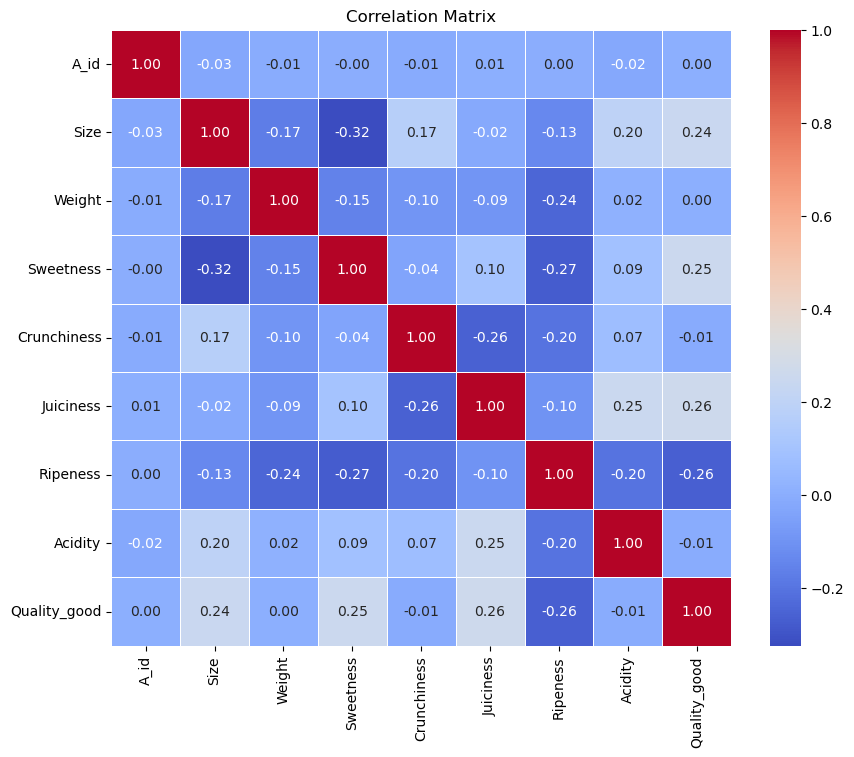

In [ ]:
# Correlation Matrix
import seaborn as sns
corr_matrix = data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Training

In [ ]:
import sagemaker
from sagemaker import image_uris

# Define the SageMaker session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

In [ ]:
# Splitting the dataset
train_data, validation_data, test_data = np.split(
    data.sample(frac=1, random_state=1729),
    [int(0.7 * len(data)), int(0.9 * len(data))],
)

# Train data
train_X = train_data.drop(["Quality_good","A_id"], axis=1)
train_y = train_data["Quality_good"]

# Validation data
validation_X = validation_data.drop(["Quality_good","A_id"], axis=1)
validation_y = validation_data["Quality_good"]

# Test data
test_X = test_data.drop(["Quality_good","A_id"], axis=1)
test_y = test_data["Quality_good"]

# Saving to CSV files
train_data.to_csv("train.csv", index=False, header=False)
validation_data.to_csv("validation.csv", index=False, header=False)
test_data.to_csv("test.csv", index=False, header=False)

In [ ]:
# Specify the container image for XGBoost
container = image_uris.retrieve("xgboost", sagemaker_session.boto_region_name, version="1.2-1")

In [ ]:
# Define the training job configuration
output_path = "s3://aws-project-02/output"

In [ ]:
xgb = sagemaker.estimator.Estimator(container,
                                     role,
                                     instance_count=1,
                                     instance_type="ml.m4.xlarge",
                                     output_path=output_path,
                                     sagemaker_session=sagemaker_session)

In [ ]:
xgb.set_hyperparameters(max_depth=5,
                         eta=0.2,
                         gamma=4,
                         min_child_weight=6,
                         subsample=0.8,
                         objective="reg:squarederror",
                         num_round=100)

In [ ]:
# Define the data channels for training and validation
train_input = sagemaker.inputs.TrainingInput("s3://aws-project-02/sagemaker/hpo-xgboost-project2/train/train", content_type="csv")
validation_input = sagemaker.inputs.TrainingInput("s3://aws-project-02/sagemaker/hpo-xgboost-project2/validation/validation", content_type="csv")

In [ ]:
# Start the training job with both training and validation datasets
xgb.fit({"train": train_input, "validation": validation_input})

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-04-10-17-48-52-609


2024-04-10 17:48:52 Starting - Starting the training job......
2024-04-10 17:49:27 Starting - Preparing the instances for training......
2024-04-10 17:50:44 Downloading - Downloading input data...
2024-04-10 17:51:19 Downloading - Downloading the training image......
2024-04-10 17:52:10 Training - Training image download completed. Training in progress..[2024-04-10 17:52:20.176 ip-10-2-188-142.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:squarederror to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Dete

In [ ]:
# Get the training job name from the estimator
training_job_name = xgb.latest_training_job.job_name

# Describe the training job to get the final metric value
training_job_info = sagemaker_session.sagemaker_client.describe_training_job(TrainingJobName=training_job_name)
final_metric_value = training_job_info["FinalMetricDataList"][0]["Value"]

print(f"Final: {final_metric_value}")

Final: 0.2905699908733368


# Hyperparameter Tuning

In [ ]:
from time import gmtime, strftime
import os

region = boto3.Session().region_name
smclient = boto3.Session().client("sagemaker")

role = sagemaker.get_execution_role()

bucket = "aws-project-02"
prefix = "sagemaker/hpo-xgboost-project2"

In [ ]:
# Saving the csv file to the bucket
boto3.Session().resource("s3").Bucket(bucket).Object(
    os.path.join(prefix, "train/train.csv")
).upload_file("train.csv")

boto3.Session().resource("s3").Bucket(bucket).Object(
    os.path.join(prefix , "validation/validation.csv")
).upload_file("validation.csv")

In [ ]:
from time import gmtime, strftime, sleep

tuning_job_name = "xgboost-aws-project-" + strftime("%d-%H-%M-%S", gmtime())

print(tuning_job_name)

tuning_job_config = {
    "ParameterRanges": {
        "CategoricalParameterRanges": [],
        "ContinuousParameterRanges": [
            {
                "MaxValue": "1",
                "MinValue": "0",
                "Name": "eta",
            },
            {
                "MaxValue": "10",
                "MinValue": "1",
                "Name": "min_child_weight",
            },
            {
                "MaxValue": "2",
                "MinValue": "0",
                "Name": "alpha",
            },
        ],
        "IntegerParameterRanges": [
            {
                "MaxValue": "10",
                "MinValue": "1",
                "Name": "max_depth",
            }
        ],
    },
    "ResourceLimits": {"MaxNumberOfTrainingJobs": 10, "MaxParallelTrainingJobs": 3},
    "Strategy": "Bayesian",
    "HyperParameterTuningJobObjective": {"MetricName": "validation:logloss", "Type": "Minimize"},
}

xgboost-aws-project-10-15-27-36


In [ ]:
from sagemaker.image_uris import retrieve

training_image = retrieve(framework="xgboost", region=region, version="1.5-1")

s3_input_train = "s3://{}/{}/train".format(bucket, prefix)
s3_input_validation = "s3://{}/{}/validation/".format(bucket, prefix)

training_job_definition = {
    "AlgorithmSpecification": {"TrainingImage": training_image, "TrainingInputMode": "File"},
    "InputDataConfig": [
        {
            "ChannelName": "train",
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_train,
                }
            },
        },
        {
            "ChannelName": "validation",
            "CompressionType": "None",
            "ContentType": "csv",
            "DataSource": {
                "S3DataSource": {
                    "S3DataDistributionType": "FullyReplicated",
                    "S3DataType": "S3Prefix",
                    "S3Uri": s3_input_validation,
                }
            },
        },
    ],
    "OutputDataConfig": {"S3OutputPath": "s3://{}/{}/output".format(bucket, prefix)},
    "ResourceConfig": {"InstanceCount": 1, "InstanceType": "ml.m4.xlarge", "VolumeSizeInGB": 10},
    "RoleArn": role,
    "StaticHyperParameters": {
        "eval_metric": "auc",
        "num_round": "100",
        #"objective": "binary:hinge",
        "objective": "binary:logistic",
        "rate_drop": "0.3",
        "tweedie_variance_power": "1.4",
    },
    "StoppingCondition": {"MaxRuntimeInSeconds": 43200},
}

In [ ]:
smclient.create_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name,
    HyperParameterTuningJobConfig=tuning_job_config,
    TrainingJobDefinition=training_job_definition,
)

{'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-east-1:280250966416:hyper-parameter-tuning-job/xgboost-aws-project-10-15-27-36',
 'ResponseMetadata': {'RequestId': 'ffe07392-be04-4645-9825-a7f611d6b6cb',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'ffe07392-be04-4645-9825-a7f611d6b6cb',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '132',
   'date': 'Wed, 10 Apr 2024 15:27:41 GMT'},
  'RetryAttempts': 0}}

In [ ]:
smclient.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)[
    "HyperParameterTuningJobStatus"
]

'Completed'

In [ ]:
smclient.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuning_job_name)['HyperParameterTuningJobName']

'xgboost-aws-project-10-15-27-36'

In [ ]:
# run this cell to check current status of hyperparameter tuning job
tuning_job_result = smclient.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name
)

status = tuning_job_result["HyperParameterTuningJobStatus"]
if status != "Completed":
    print("Reminder: the tuning job has not been completed.")

job_count = tuning_job_result["TrainingJobStatusCounters"]["Completed"]
print("%d training jobs have completed" % job_count)

objective = tuning_job_result["HyperParameterTuningJobConfig"]["HyperParameterTuningJobObjective"]
is_minimize = objective["Type"] != "Maximize"
objective_name = objective["MetricName"]

10 training jobs have completed


In [ ]:
from pprint import pprint

if tuning_job_result.get("BestTrainingJob", None):
    print("Best model found so far:")
    pprint(tuning_job_result["BestTrainingJob"])
else:
    print("No training jobs have reported results yet.")

Best model found so far:
{'CreationTime': datetime.datetime(2024, 4, 10, 15, 33, 9, tzinfo=tzlocal()),
 'FinalHyperParameterTuningJobObjectiveMetric': {'MetricName': 'validation:logloss',
                                                 'Value': 0.6933199763298035},
 'ObjectiveStatus': 'Succeeded',
 'TrainingEndTime': datetime.datetime(2024, 4, 10, 15, 33, 50, tzinfo=tzlocal()),
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:280250966416:training-job/xgboost-aws-project-10-15-27-36-010-7f7e7ae0',
 'TrainingJobName': 'xgboost-aws-project-10-15-27-36-010-7f7e7ae0',
 'TrainingJobStatus': 'Completed',
 'TrainingStartTime': datetime.datetime(2024, 4, 10, 15, 33, 14, tzinfo=tzlocal()),
 'TunedHyperParameters': {'alpha': '0.21873760237067041',
                          'eta': '0.0031952091784340775',
                          'max_depth': '4',
                          'min_child_weight': '2.3791240277463035'}}
